In [220]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from sklearn.metrics import f1_score, accuracy_score, precision_score, classification_report
from keras.layers import LSTM, Conv1D, Flatten, Dropout, Dense, Embedding, MaxPooling1D

In [4]:
df = pd.read_csv('dataset/emotions-dataset.csv')

In [6]:
df

,message,emotion
0,i used to be able to hang around talk with the...,anger
1,i get made to feel left out and unimportant in...,sadness
2,i wasnt going to post today as i am feeling qu...,sadness
3,i feel extremely delicate and a bit helpless,love
4,i feel frightened that i might fail to notice ...,fear
...,...,...
11995,i feel useless for wasting k hours k just for ...,sadness
11996,i feel rushed and pulled and rung out and i kn...,anger
11997,i feel absolutely disgusted,anger
11998,i know that we are all sinners and fall short ...,sadness


<Axes: xlabel='emotion'>

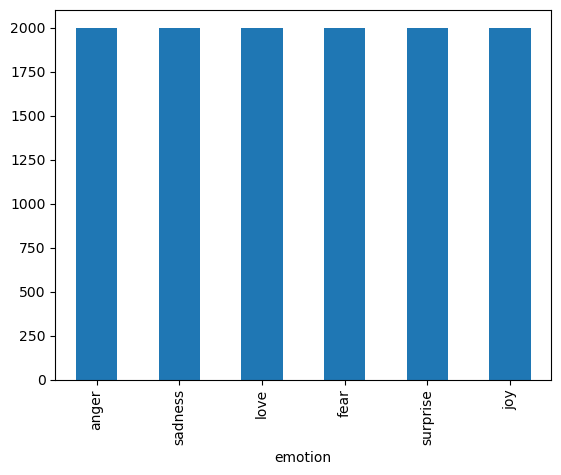

In [8]:
# check if the dataset is balanced
df['emotion'].value_counts().plot.bar()

In [10]:
df.isnull().sum()

message    0
emotion    0
dtype: int64

<Axes: ylabel='Frequency'>

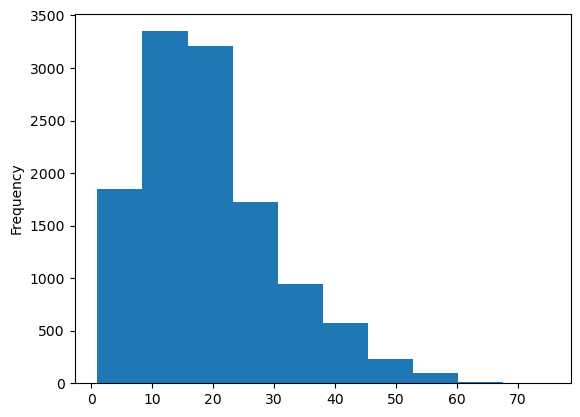

In [20]:
#distribution of words

#gleda kolku zborovi ima vo 1 recenica
df['message'].str.split(' ').apply(len).plot.hist()

<Axes: >

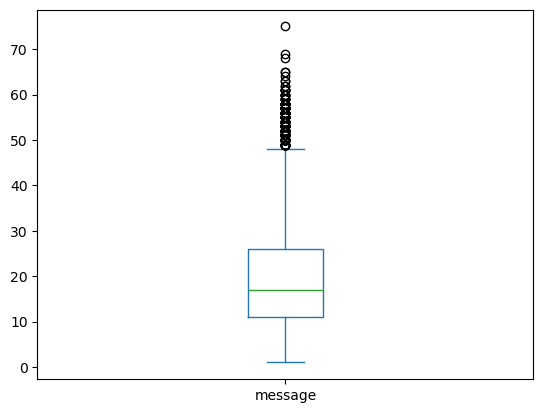

In [22]:
df["message"].str.split().apply(len).plot.box()

In [26]:
df = df[df['message'].str.split().apply(len) < 45].copy(deep=True)

In [28]:
df

,message,emotion
0,i used to be able to hang around talk with the...,anger
1,i get made to feel left out and unimportant in...,sadness
3,i feel extremely delicate and a bit helpless,love
4,i feel frightened that i might fail to notice ...,fear
5,i feel stubborn because i just want my seattle...,anger
...,...,...
11995,i feel useless for wasting k hours k just for ...,sadness
11996,i feel rushed and pulled and rung out and i kn...,anger
11997,i feel absolutely disgusted,anger
11998,i know that we are all sinners and fall short ...,sadness


<Axes: ylabel='Frequency'>

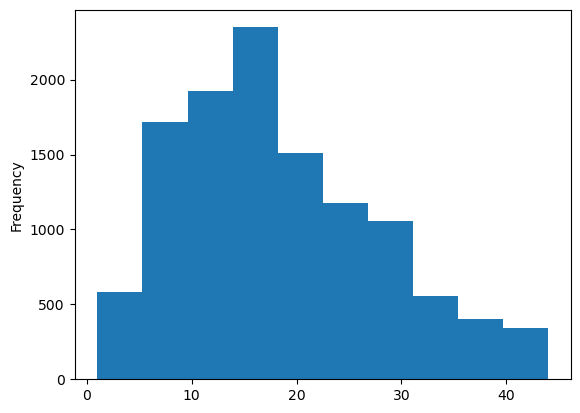

In [34]:
df['message'].str.split().apply(len).plot.hist()

#pr.500 i neso recenici so po 6 zborovi

<Axes: >

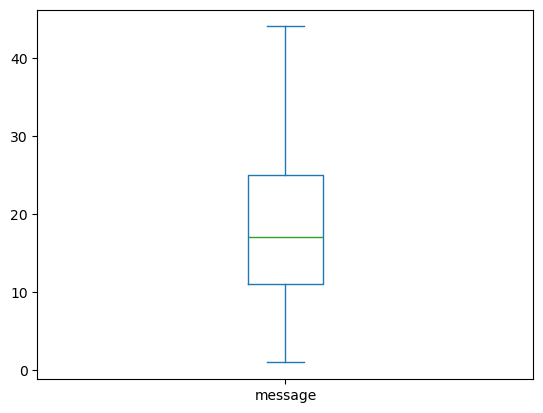

In [32]:
df["message"].str.split().apply(len).plot.box()

In [38]:
def get_vocabulary(texts: list[str]) -> list[str]: #lista od site mozni zborovi
    vocabulary = []
    for text in texts:
        for word in text.split(" "):
            vocabulary.append(word)
    return list(set(vocabulary))

In [40]:
vocabulary = get_vocabulary(df['message'].tolist())

In [248]:
vocabulary

['dragon',
 'book',
 'awful',
 'compliment',
 'paired',
 'toliet',
 'disasters',
 'apparently',
 'torrentially',
 'illuminating',
 'ave',
 'adapting',
 'emeraude',
 'reflections',
 'commandments',
 'faintly',
 'thought',
 'porn',
 'ourselves',
 'victimized',
 'heaped',
 'hom',
 'ahead',
 'complete',
 'breakfast',
 'clay',
 'population',
 'jummah',
 'toomie',
 'unworthy',
 'neuropsychology',
 'withstand',
 'drivers',
 'compressed',
 'loops',
 'entrusted',
 'config',
 'multi',
 'astonishment',
 'poop',
 'obtained',
 'now',
 'observational',
 'deleting',
 'amplifying',
 'seen',
 'tony',
 'rewind',
 'purples',
 'balancing',
 'propose',
 'binge',
 'willy',
 'flaky',
 'transcends',
 'cloth',
 'municipalities',
 'school',
 'clingy',
 'gaji',
 'preparing',
 'weightloss',
 'infusing',
 'caring',
 'overflowing',
 'art',
 'lied',
 'sl',
 'seananners',
 'stress',
 'me',
 'everyday',
 'riddles',
 'homicidal',
 'interact',
 'football',
 'artwork',
 'inhabijustshutthefuckupalready',
 'dropped',
 'hum

In [44]:
len(vocabulary)

12665

In [48]:
df['emotion'].unique()

array(['anger', 'sadness', 'love', 'fear', 'surprise', 'joy'],
      dtype=object)

In [46]:
max_vocabulary_size = 10000

In [66]:
x = df['message']
y = pd.get_dummies(df['emotion']) #one-hot pravi - za sekoja kolona posebno

In [68]:
x

0        i used to be able to hang around talk with the...
1        i get made to feel left out and unimportant in...
3             i feel extremely delicate and a bit helpless
4        i feel frightened that i might fail to notice ...
5        i feel stubborn because i just want my seattle...
                               ...                        
11995    i feel useless for wasting k hours k just for ...
11996    i feel rushed and pulled and rung out and i kn...
11997                          i feel absolutely disgusted
11998    i know that we are all sinners and fall short ...
11999    i guess i just feel aggravated that i cant get...
Name: message, Length: 11607, dtype: object

In [70]:
y

,anger,fear,joy,love,sadness,surprise
0,True,False,False,False,False,False
1,False,False,False,False,True,False
3,False,False,False,True,False,False
4,False,True,False,False,False,False
5,True,False,False,False,False,False
...,...,...,...,...,...,...
11995,False,False,False,False,True,False
11996,True,False,False,False,False,False
11997,True,False,False,False,False,False
11998,False,False,False,False,True,False


In [56]:
y.shape

(11607, 6)

In [72]:
num_classes = y.shape[1]
num_classes

6

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [82]:
tokenizer = Tokenizer(num_words=max_vocabulary_size)
tokenizer.fit_on_texts(x_train.values)

In [88]:
x_train

1950     i got a feeling that they weren t here for a f...
9969     i feel terrified and your notes and concerns w...
5846     i know so many of you feel overwhelming longin...
9332     i particularly liked the colouring of melanie ...
5136                             i feel passionate i write
                               ...                        
7694     i feel the word funny should be incorporated r...
10638    i was feeling pretty groggy after not getting ...
6911                           i feel a bit eager to share
5381     i began to feel alarmed and begged him to explain
11307    i vote aye because aye love you guys and have ...
Name: message, Length: 9285, dtype: object

In [90]:
x_train = tokenizer.texts_to_sequences(x_train)

In [250]:
x_train

array([[   0,    0,    0, ...,    6, 1130, 2061],
       [   0,    0,    0, ...,   66,  575,  139],
       [   0,    1,   43, ...,    6, 1077,  409],
       ...,
       [   0,    0,    0, ...,  997,    4,  290],
       [   0,    0,    0, ...,   67,    4,  567],
       [   0,    0,    0, ...,  236,   31,  669]], dtype=int32)

In [94]:
x_test = tokenizer.texts_to_sequences(x_test)

In [252]:
x_test

array([[   0,    0,    0, ...,    6, 4922,  456],
       [   0,    0,    0, ..., 1443,   25,  167],
       [   0,    0,    0, ...,  201,    7,  365],
       ...,
       [   0,    0,    0, ..., 1722,   10, 1354],
       [   0,    0,    0, ...,   67,   21, 1139],
       [   0,    0,    0, ...,   23,  144, 2647]], dtype=int32)

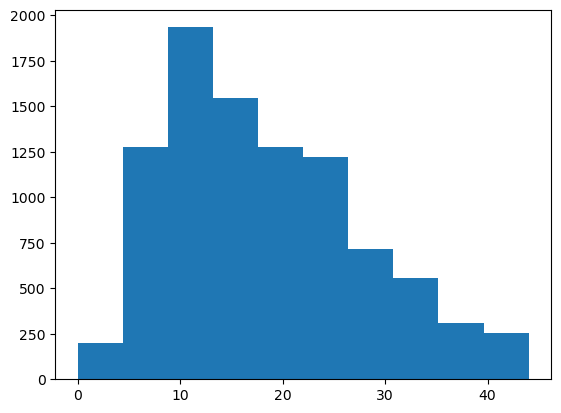

In [106]:
import matplotlib.pyplot as plt

plt.hist([len(tokens) for tokens in x_train])
plt.show()

In [108]:
maxlen=32

In [130]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [132]:
x_train.shape

(9285, 32)

In [134]:
x_test.shape

(2322, 32)

In [232]:
model = Sequential([

    #input_dim=10000  (number of unique tokens)
    #output_Dim = 128 dimenzionalen vektor 
    #Embedding - pravi 128 dimenzionalen vektor od sekoj token, od sekoj zbor za da vidi kakva relacija ima so drugite 
    # Converts input tokens (words or features) into dense vector representations (embeddings).
    Embedding(input_dim=max_vocabulary_size, output_dim=128),
    #pravime konvoluciski layer za da se namali rizikot za overfit, 
    # Applies 1D convolution to the embedded sequence, which helps in detecting local patterns in the sequence.
    Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'), #"same"` results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    #posle sekoj konvoluciski sloj go stavame 
    MaxPooling1D(pool_size=2), #Purpose: Downsamples the sequence by taking the maximum value from each pool of 2 consecutive values.
    #zgolemuva 
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(64,dropout=0.1, recurrent_dropout=0.1),
    #6 broj na klasi
    #softmax deka imame multi class classification
    Dense(num_classes, activation='softmax')
])

In [234]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [236]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
233/233 [==============================] - 7s 21ms/step - loss: 1.4333 - accuracy: 0.3596 - val_loss: 0.9265 - val_accuracy: 0.6058
Epoch 2/5
233/233 [==============================] - 5s 20ms/step - loss: 0.6293 - accuracy: 0.7845 - val_loss: 0.5125 - val_accuracy: 0.8476
Epoch 3/5
233/233 [==============================] - 5s 19ms/step - loss: 0.3911 - accuracy: 0.8823 - val_loss: 0.5208 - val_accuracy: 0.8428
Epoch 4/5
233/233 [==============================] - 5s 20ms/step - loss: 0.2908 - accuracy: 0.9138 - val_loss: 0.5030 - val_accuracy: 0.8546
Epoch 5/5
233/233 [==============================] - 5s 20ms/step - loss: 0.2312 - accuracy: 0.9272 - val_loss: 0.6793 - val_accuracy: 0.8255


In [238]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 128)         1280000   
                                                                 
 conv1d_22 (Conv1D)          (None, None, 32)          16416     
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, None, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, None, 64)          8256      
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 lstm_22 (LSTM)              (None, None, 128)       

<Axes: >

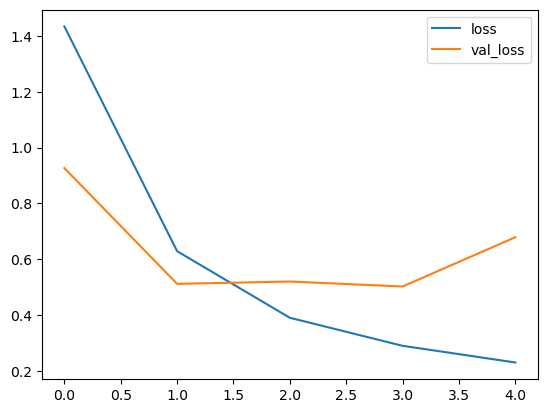

In [240]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [242]:
y_pred = model.predict(x_test)

73/73 [==============================] - 0s 3ms/step


In [244]:
y_test = y_test.values.argmax(axis=1)
y_pred = y_pred.argmax(axis=1)

In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       388
           1       0.95      0.85      0.90       378
           2       0.69      0.80      0.74       397
           3       0.88      0.79      0.84       391
           4       0.76      0.77      0.76       398
           5       0.88      0.97      0.92       370

    accuracy                           0.83      2322
   macro avg       0.84      0.83      0.83      2322
weighted avg       0.84      0.83      0.83      2322

